In [ ]:
from PIL import Image
import requests
from io import BytesIO

# Data Visualization

## Figures
- **Discovery**
  - Provide an overview of the data.
  - Convey the scale and complexity of your data and its structure.
  - Explore intersting patterns in your data.
- **Communication**
  - Display information in a readily understandable way.
  - Beneficial for grabbing attention and interest, but can be viewed as intimidating (Barabasi, 2010). Only Represent the key variables that benefit your research.


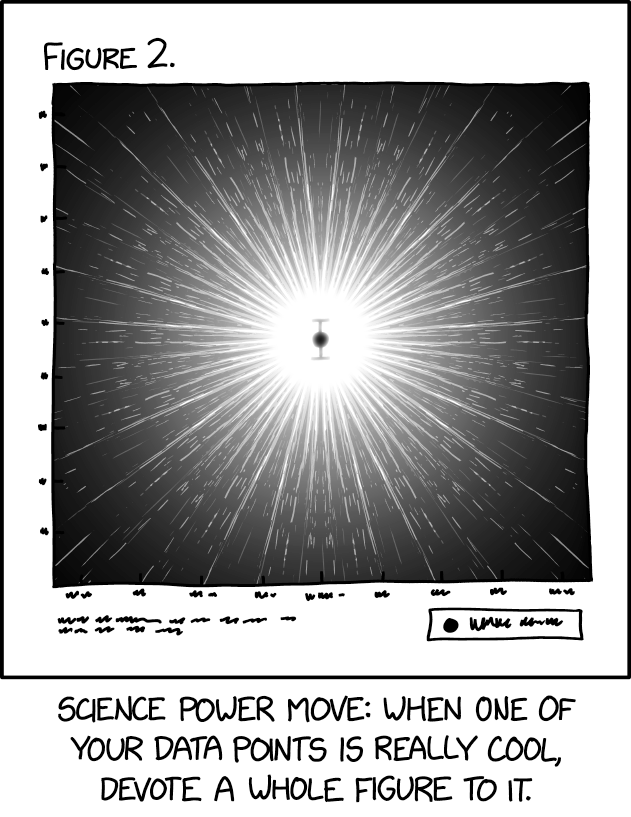

## Principles of Data Visualization


Selected Principles From Midway (2020):

- **Principle 1:** (Mentally) Diagram First. Prioritize the information you want to share and envision it before trying to plot it in code.
  - Is your visual objective to show a comparison? A ranking?
- **Principle 2:** Use the correct figure for the data.
  - Are you trying to convey a comparison (amounts), proportions (compositions), distributions, or relationships?
- **Principle 3:** Color always means something. It is always recommended to design color figures that work effectively in both color and black-and-white formats. It is also good practice to use color schemes that are effective for [colorblind readers.](https://colorbrewer2.org/#type=sequential&scheme=YlGnBu&n=9)

  - Sequential color (Continuous) schemes range from dark to light.
  - Diverging color (Zero-Point) schemes often have two colors with white in the center.
  - Qualitative color (Categorical) schemes are used to differentiate qualitative groups.
  - [Sample color schemes.](https://www.practicalpythonfordatascience.com/ap_seaborn_palette)
- **Principle 4:** Include uncertainty. Whenever possible, include confidence intervals, error bars, etc., to provide accurate representations of your data.

- **Principle 5:** Panel your figures when possible. If a series of charts contains the same axes, scales, etc., combining multiple figures together can easily show differences in the data.

- **Principle 6:** Always include captions and figure labels. Your figures are not self-explanatory.

### Bad Data Visualization

Below are some examples of bad visualization. What is wrong with these figures and how could they be improved?

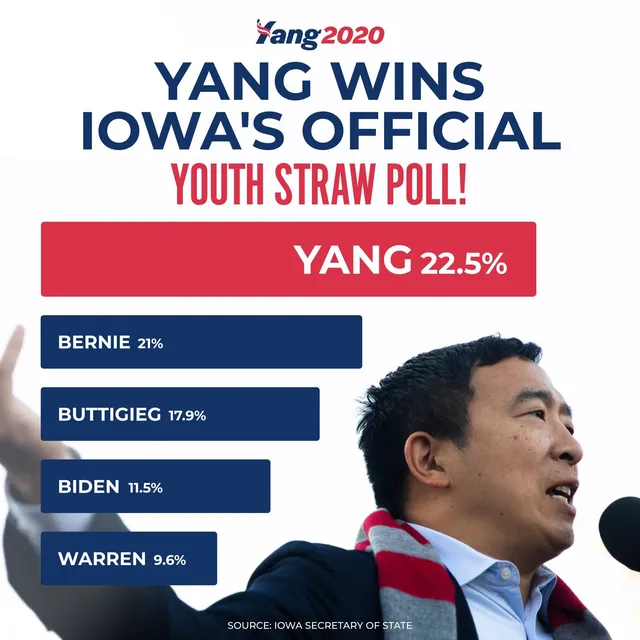

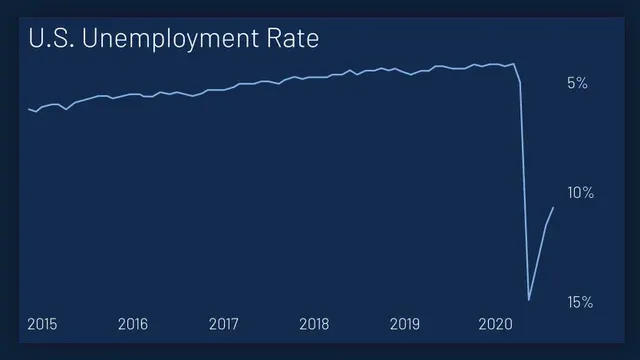

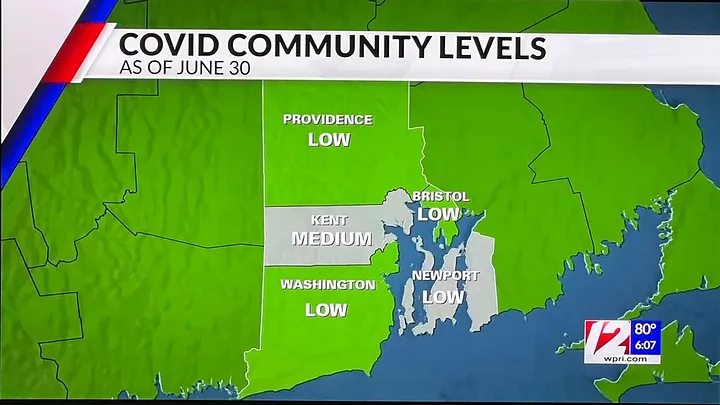

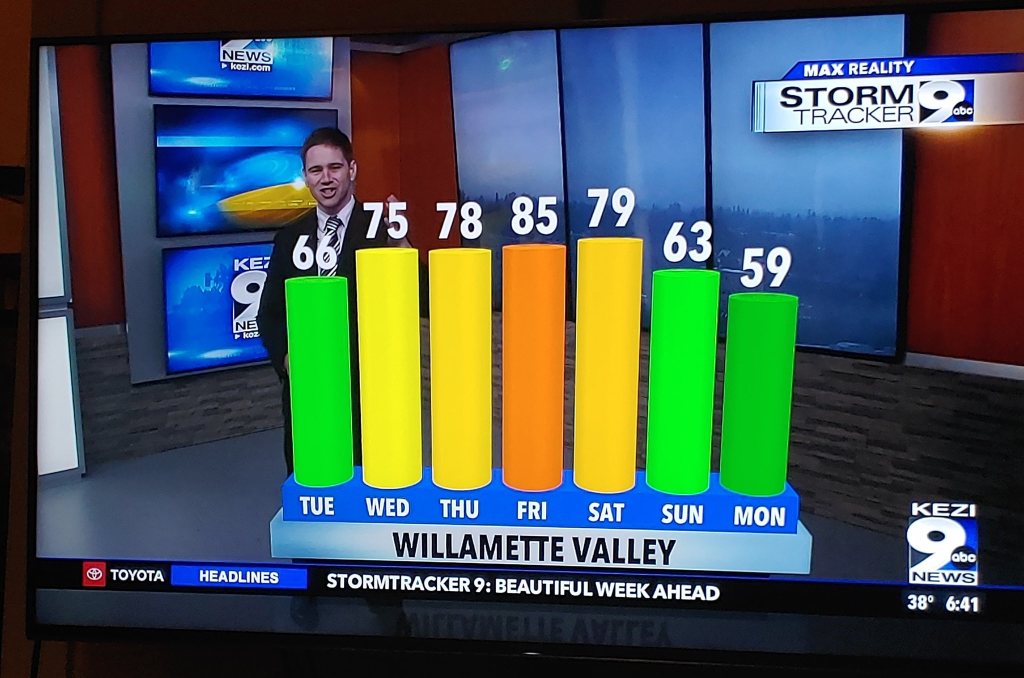

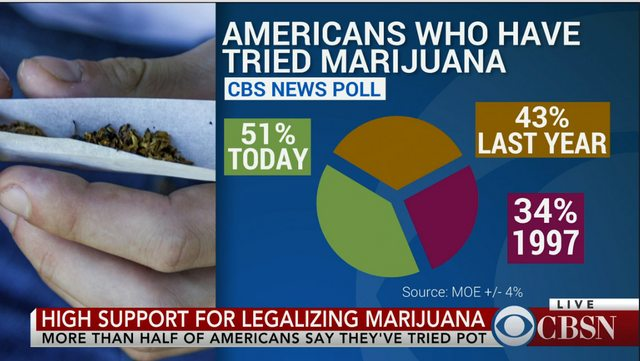

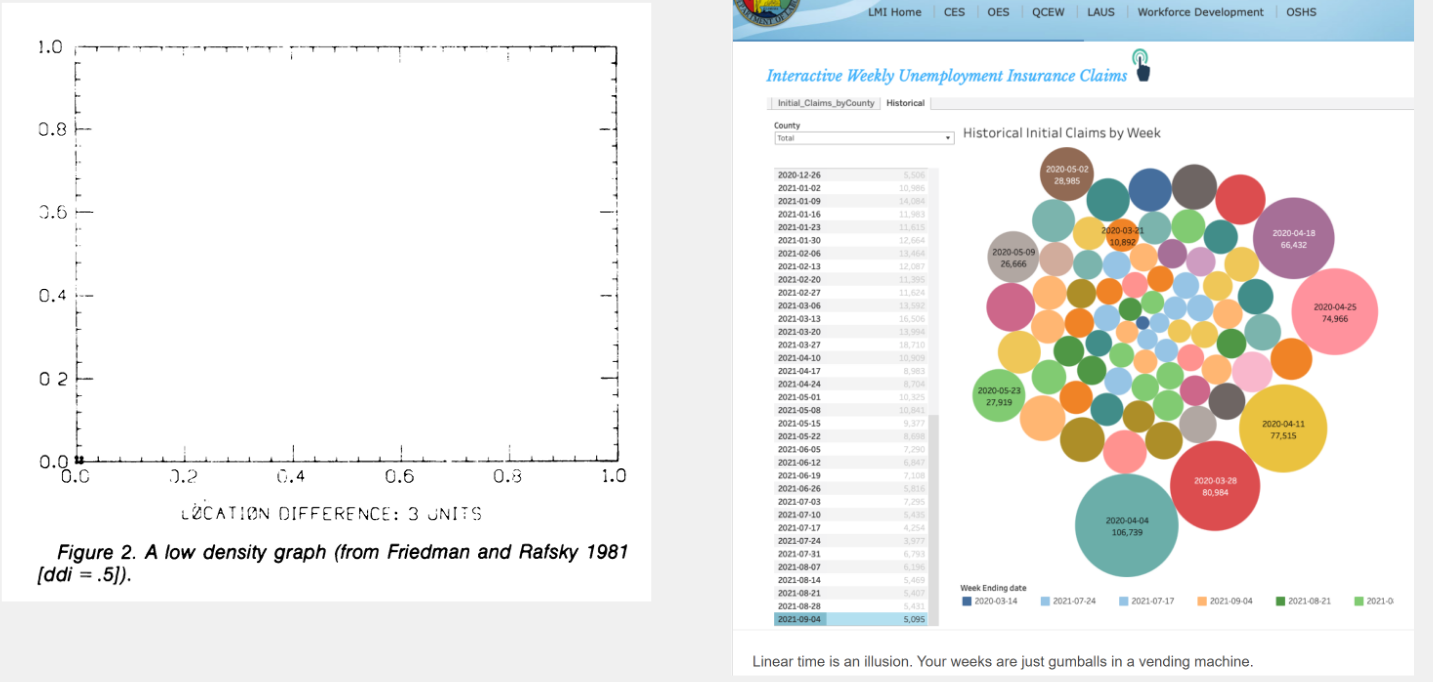

## 4 Common Visualization Mistakes

1. Wrong Type of Figure:
  - Relationships between variables = scatterplot
  - Group differences = Bar, dot, and violin charts
  - Distributions of data = Histograms
  - Time related data = Bar or line graph.

2. Too Many Variables
  - Only represent the key variables that benefit the research. Too much information crammed in the same figure will lead to some information getting lost.

3. Improper Scaling
  - The x and y axis should be chosen to accurately represent the data.

4. Color Choices
 - Color should aid understanding not hinder it.




> Every data visualization, like any descriptive statistic, is a simplification of your data. Just like descriptive statistics can mask meaningful underlying variation, basic visualizations that oversimplify your data can do so as well.

https://www.youtube.com/watch?v=DbJyPELmhJc

## Describing Data

- Running descriptive statistics on your dataset is highly beneficial in "getting to know your data."


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/CoffeeAndCodeLT2018 - CoffeeAndCodeLT2018.csv')

df.describe(include = 'all')


CodingHours  CoffeeCupsPerDay    CoffeeTime CodingWithoutCoffee  \
count    100.000000        100.000000           100                 100   
unique          NaN               NaN             7                   3   
top             NaN               NaN  While coding           Sometimes   
freq            NaN               NaN            61                  51   
mean       6.410000          2.890000           NaN                 NaN   
std        2.644205          1.613673           NaN                 NaN   
min        1.000000          1.000000           NaN                 NaN   
25%        4.000000          2.000000           NaN                 NaN   
50%        7.000000          2.500000           NaN                 NaN   
75%        8.000000          4.000000           NaN                 NaN   
max       10.000000          8.000000           NaN                 NaN   

       CoffeeType CoffeeSolveBugs Gender  Country  AgeRange  
count          99             100    100      100        98  
unique          8               3      2        1         5  
top       Nescafe       Sometimes   Male  Lebanon  18 to 29  
freq           32              43     74      100        60  
mean          NaN             NaN    NaN      NaN       NaN  
std           NaN             NaN    NaN      NaN       NaN  
min           NaN             NaN    NaN      NaN       NaN  
25%           NaN             NaN    NaN      NaN       NaN  
50%           NaN             NaN    NaN      NaN       NaN  
75%           NaN             NaN    NaN      NaN       NaN  
max           NaN             NaN    NaN      NaN       NaN

## Types of Figures


### Histograms

- Most commonly used graph to show the frequency of discrete or continuous data.
  - Since the data is continuous, there is no space between bars.
- Data points are grouped based on bin values, with the entire range of data divided into non-overlapping bins.
- Bins cannot be reordered.


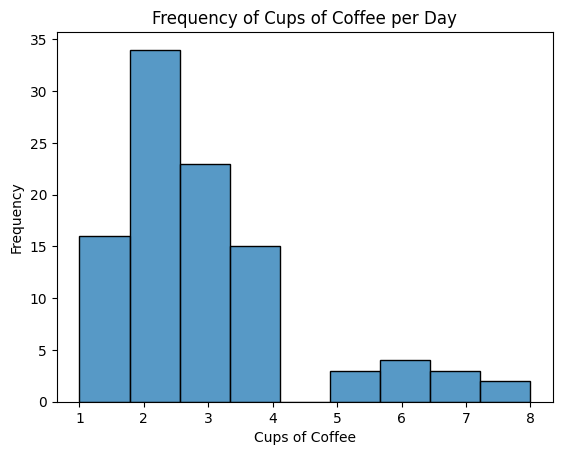

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Making the histogram
sns.histplot(data=df, x='CoffeeCupsPerDay')
plt.title('Frequency of Cups of Coffee per Day') #Informative title for the figure.
plt.xlabel('Cups of Coffee') # Specify the labels so that you are not just using the variable label from your dataframe.
plt.ylabel('Frequency')
plt.show()

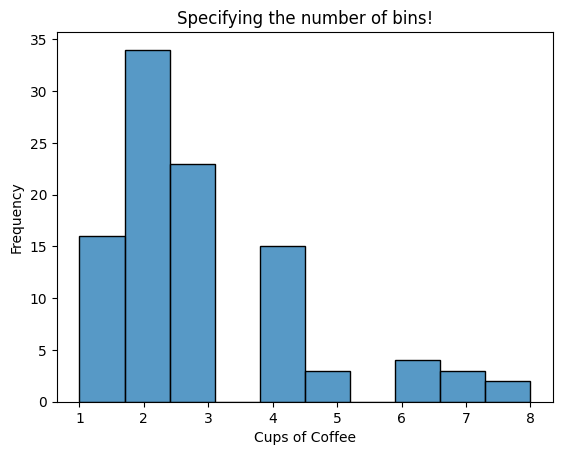

In [ ]:
# Adding more bins!
sns.histplot(data=df, x='CoffeeCupsPerDay', bins = 10)
plt.title('Specifying the number of bins!')
plt.xlabel('Cups of Coffee')
plt.ylabel('Frequency')
plt.show()

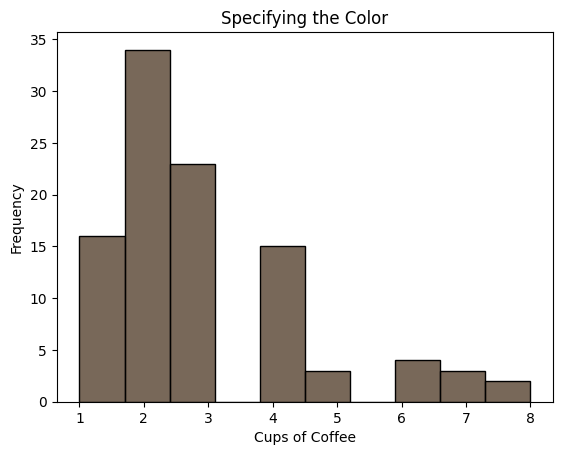

In [ ]:
# Changing the color!
sns.histplot(data=df, x='CoffeeCupsPerDay', bins = 10, color = "#4B3621")
plt.title('Specifying the Color')
plt.xlabel('Cups of Coffee')
plt.ylabel('Frequency')
plt.show()

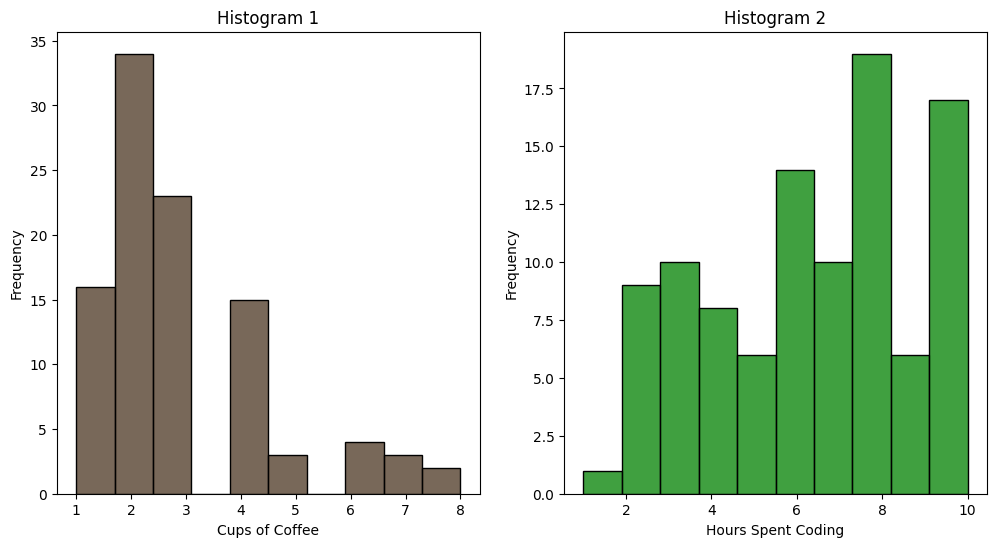

In [ ]:
# Grouping histograms together into one figure.

# Specify the function for connecting the plots together and specify the size.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns of subplots

sns.histplot(df, bins = 10, color = "#4B3621", x = 'CoffeeCupsPerDay', ax=ax1)
ax1.set_xlabel('Cups of Coffee')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram 1')

sns.histplot(df, bins = 10, color='green',x ='CodingHours', ax=ax2)
ax2.set_xlabel('Hours Spent Coding')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram 2')

plt.show()

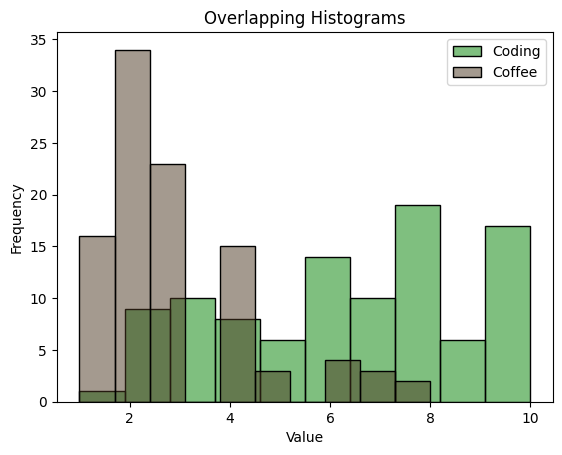

In [ ]:
# Overlapping Histograms

sns.histplot(df, x = 'CodingHours', bins=10, color= 'green', alpha=0.5, label='Coding')
sns.histplot(df, x = 'CoffeeCupsPerDay', bins=10, color= "#4B3621", alpha=0.5, label='Coffee')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Overlapping Histograms')
plt.legend()  # Show the legend to differentiate the datasets
plt.show()

### Bar Charts

- Also called bar graphs or column charts.
- Plot numeric values for different levels of a categorical variable.
- Maintain rectangular shapes for your bars (i.e., avoid curved lines, 3D effects, or shadows).
- Categories can be reordered based on interest or preferred organization.

<ipython-input-49-84e042b7756b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="CoffeeCupsPerDay", y="CoffeeType", palette=coffee_palette)
<ipython-input-49-84e042b7756b>:15: UserWarning: 
The palette list has fewer values (7) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df, x="CoffeeCupsPerDay", y="CoffeeType", palette=coffee_palette)


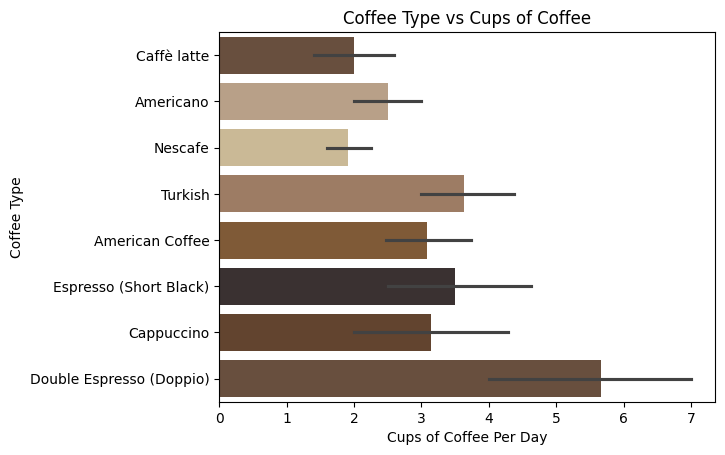

In [ ]:
# Making a color scheme for the bar chart.
coffee_colors = [
    "#6F4E37",  # Coffee Brown
    "#C0A080",  # Latte Beige
    "#D3BC8D",  # Cappuccino Cream
    "#A67B5B",  # Mocha Brown
    "#8B5A2B",  # Dark Coffee
    "#3B2F2F",  # Espresso
    "#6B4226"   # Dark Roast
]

#Specifying the palette
coffee_palette = sns.color_palette(coffee_colors)

sns.barplot(data=df, x="CoffeeCupsPerDay", y="CoffeeType", palette=coffee_palette)
plt.title('Coffee Type vs Cups of Coffee')
plt.xlabel('Cups of Coffee Per Day')
plt.ylabel('Coffee Type')
plt.show()

### Boxplots

- Also known as Box and Whisker Plots.
- Use boxes and lines to display the distribution and skewness of the data.
- The center line of the box represents the median, while the box itself represents the interquartile range (IQR). The whiskers extend to 1.5 times the IQR, and any points outside this range are considered outliers.


<Axes: ylabel='CodingHours'>

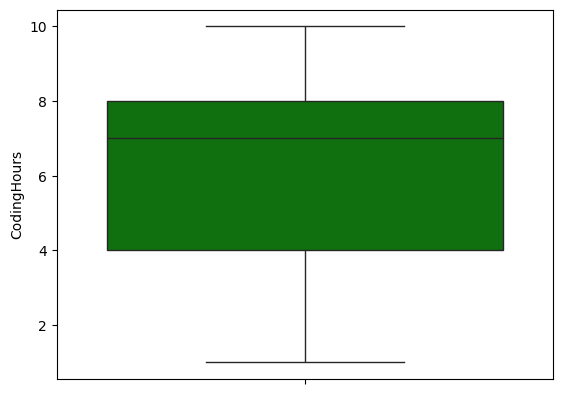

In [ ]:
sns.boxplot(df['CodingHours'], color = 'green')

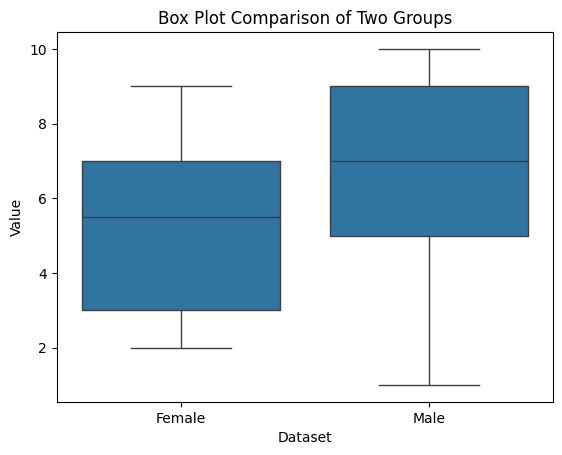

In [ ]:
sns.boxplot(x='Gender', y='CodingHours', data=df)

# Customize the plot
plt.xlabel('Dataset')
plt.ylabel('Value')
plt.title('Box Plot Comparison of Two Groups')

# Display the plot
plt.show()

💡 Flashback: Performing a T-Test

In [ ]:
import scipy.stats as stats

# Extract the data for gender and coding hours
gender_data = df['Gender']
coffee_data = df['CoffeeCupsPerDay']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(coffee_data[gender_data == 'Male'], coffee_data[gender_data == 'Female'])

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: 2.3307531836456743
P-value: 0.02181598745326643


In [ ]:
df.groupby('Gender')['CoffeeCupsPerDay'].agg(['mean', 'std'])


mean       std
Gender                    
Female  2.269231  1.218448
Male    3.108108  1.684478

**Interpretation**: The number of coffee cups consumed daily by different genders was compared using an independent samples t-test. The results indicated a significant gender difference in daily coffee consumption,
𝑡= 2.33, 𝑝 = .021. On average, women drank fewer cups of coffee per day (M = 2.27, SD = 1.22) compared to men (M = 3.11, SD = 1.68).

### Scatterplots
- Also known as a scatter chart or scatter graph, this type of plot uses dots to represent the relationship between two continuous variables.
  - You can change the shape of the points to enhance interpretation.
- These plots are effective for illustrating patterns as well as specific data values.
- Be carefull of overplotting, where data points overlap excessively, making it difficult to differentiate them.

In [ ]:
#Loading a new dataset (contained within seaborn)
tips = sns.load_dataset("tips")
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

<Axes: xlabel='total_bill', ylabel='tip'>

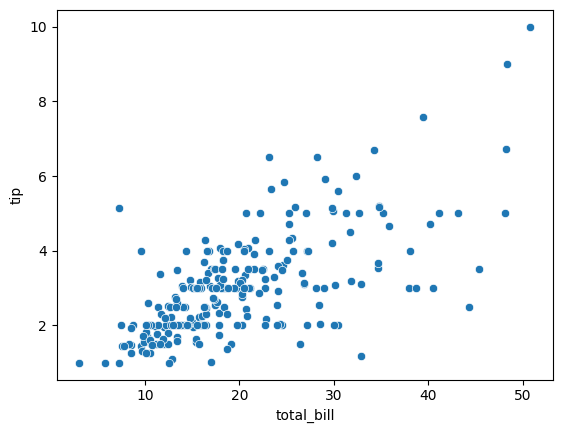

In [ ]:
sns.scatterplot(x="total_bill", y="tip", data=tips)

<Axes: xlabel='total_bill', ylabel='tip'>

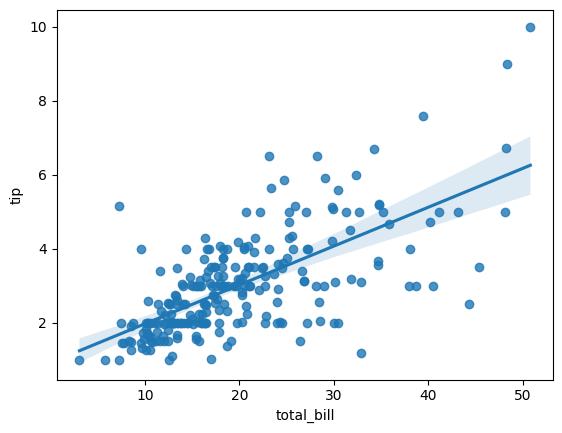

In [ ]:
#Adding a regression line
sns.regplot(x="total_bill", y="tip", data=tips)

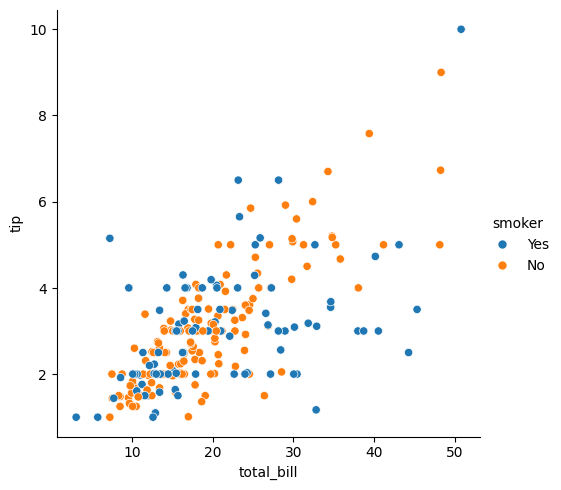

In [ ]:
#Scatterplot with grouping variable.
sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker")

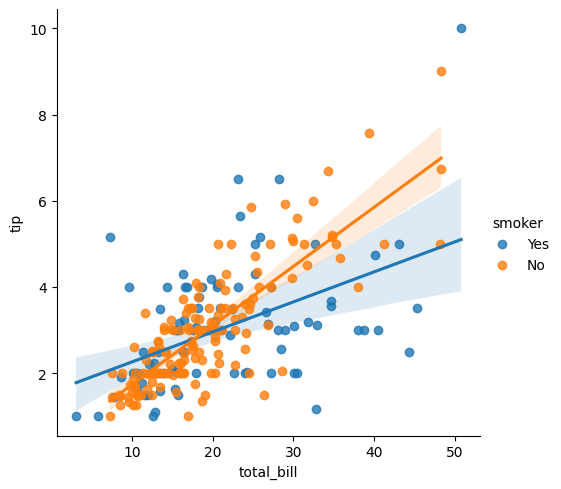

In [ ]:
#Adding a regression line for each group
sns.lmplot(data=tips, x="total_bill", y="tip", hue="smoker")

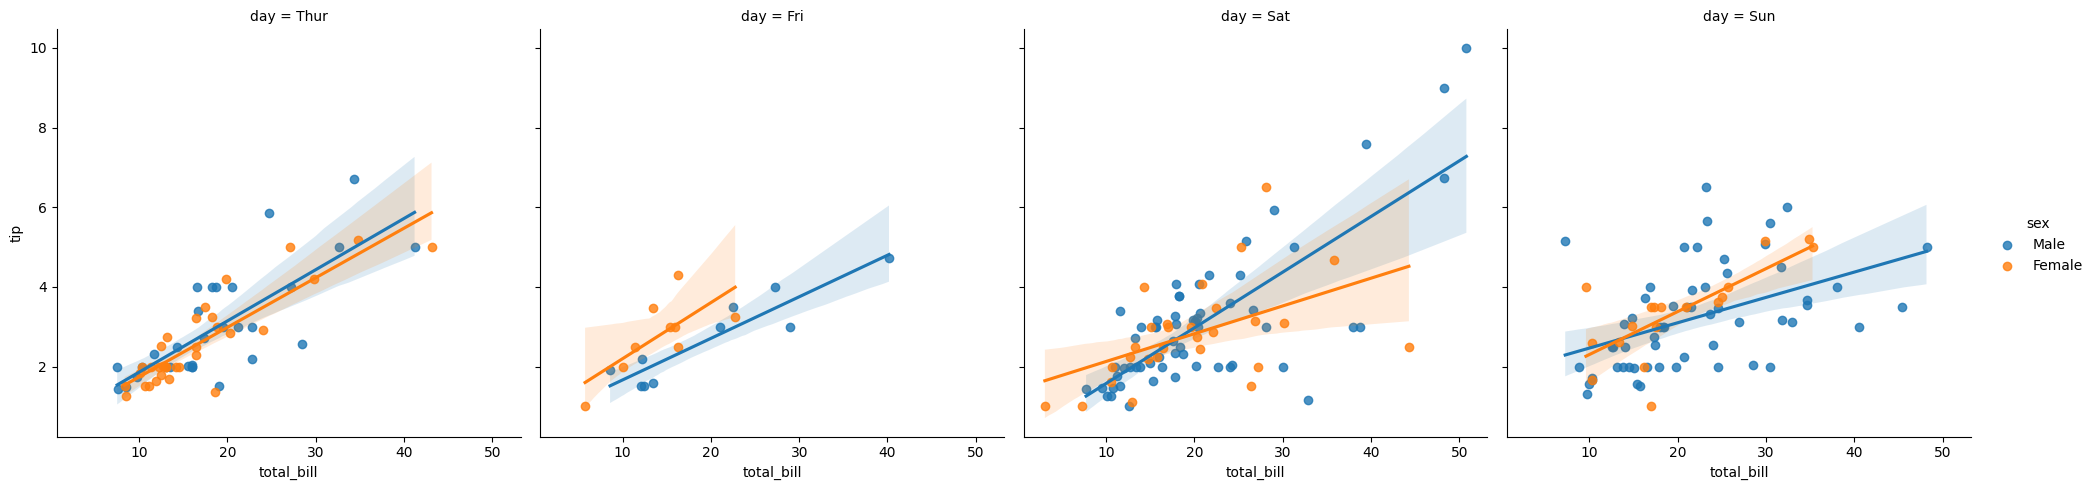

In [ ]:
# Splitting the plot across another grouping variable.
sns.lmplot(x='total_bill', y='tip', data=tips, col='day', hue='sex')

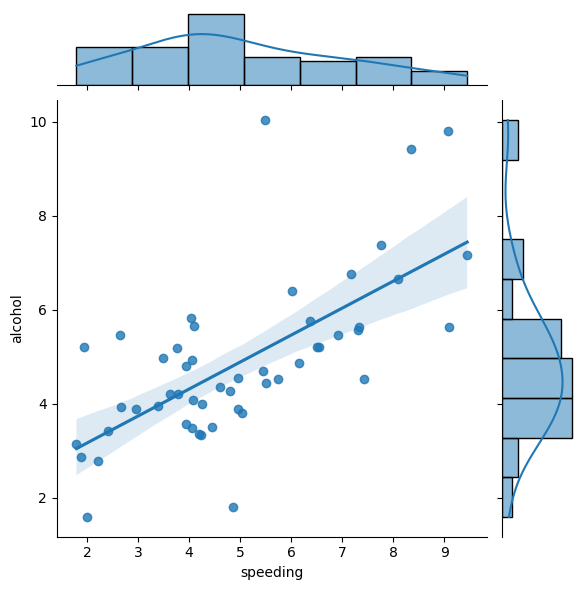

In [ ]:
#Loading new data (Also within seaborn)
crash_df = sns.load_dataset('car_crashes')

#Displaying the distrubution and relationship of variables at the same time.
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

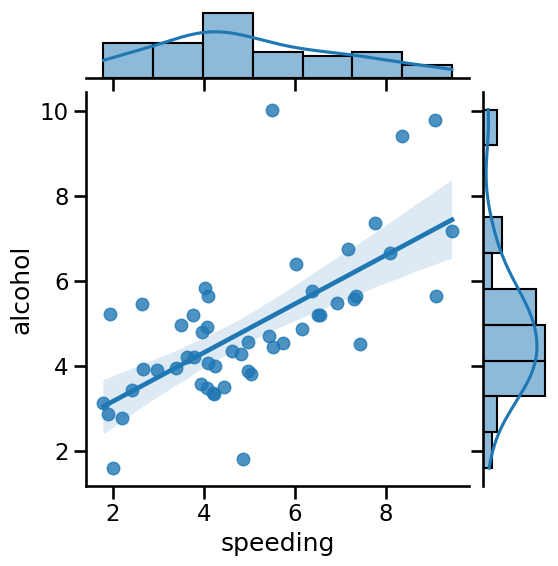

In [ ]:
#Changing the theme of the figure
sns.set_context("talk")
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

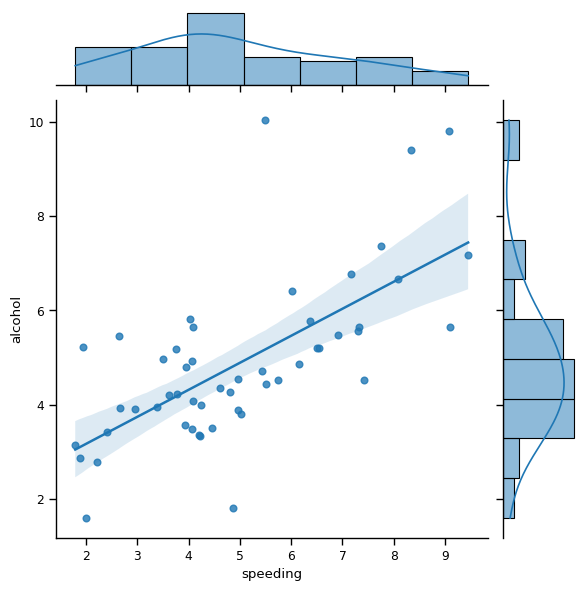

In [ ]:
sns.set_context("paper")
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

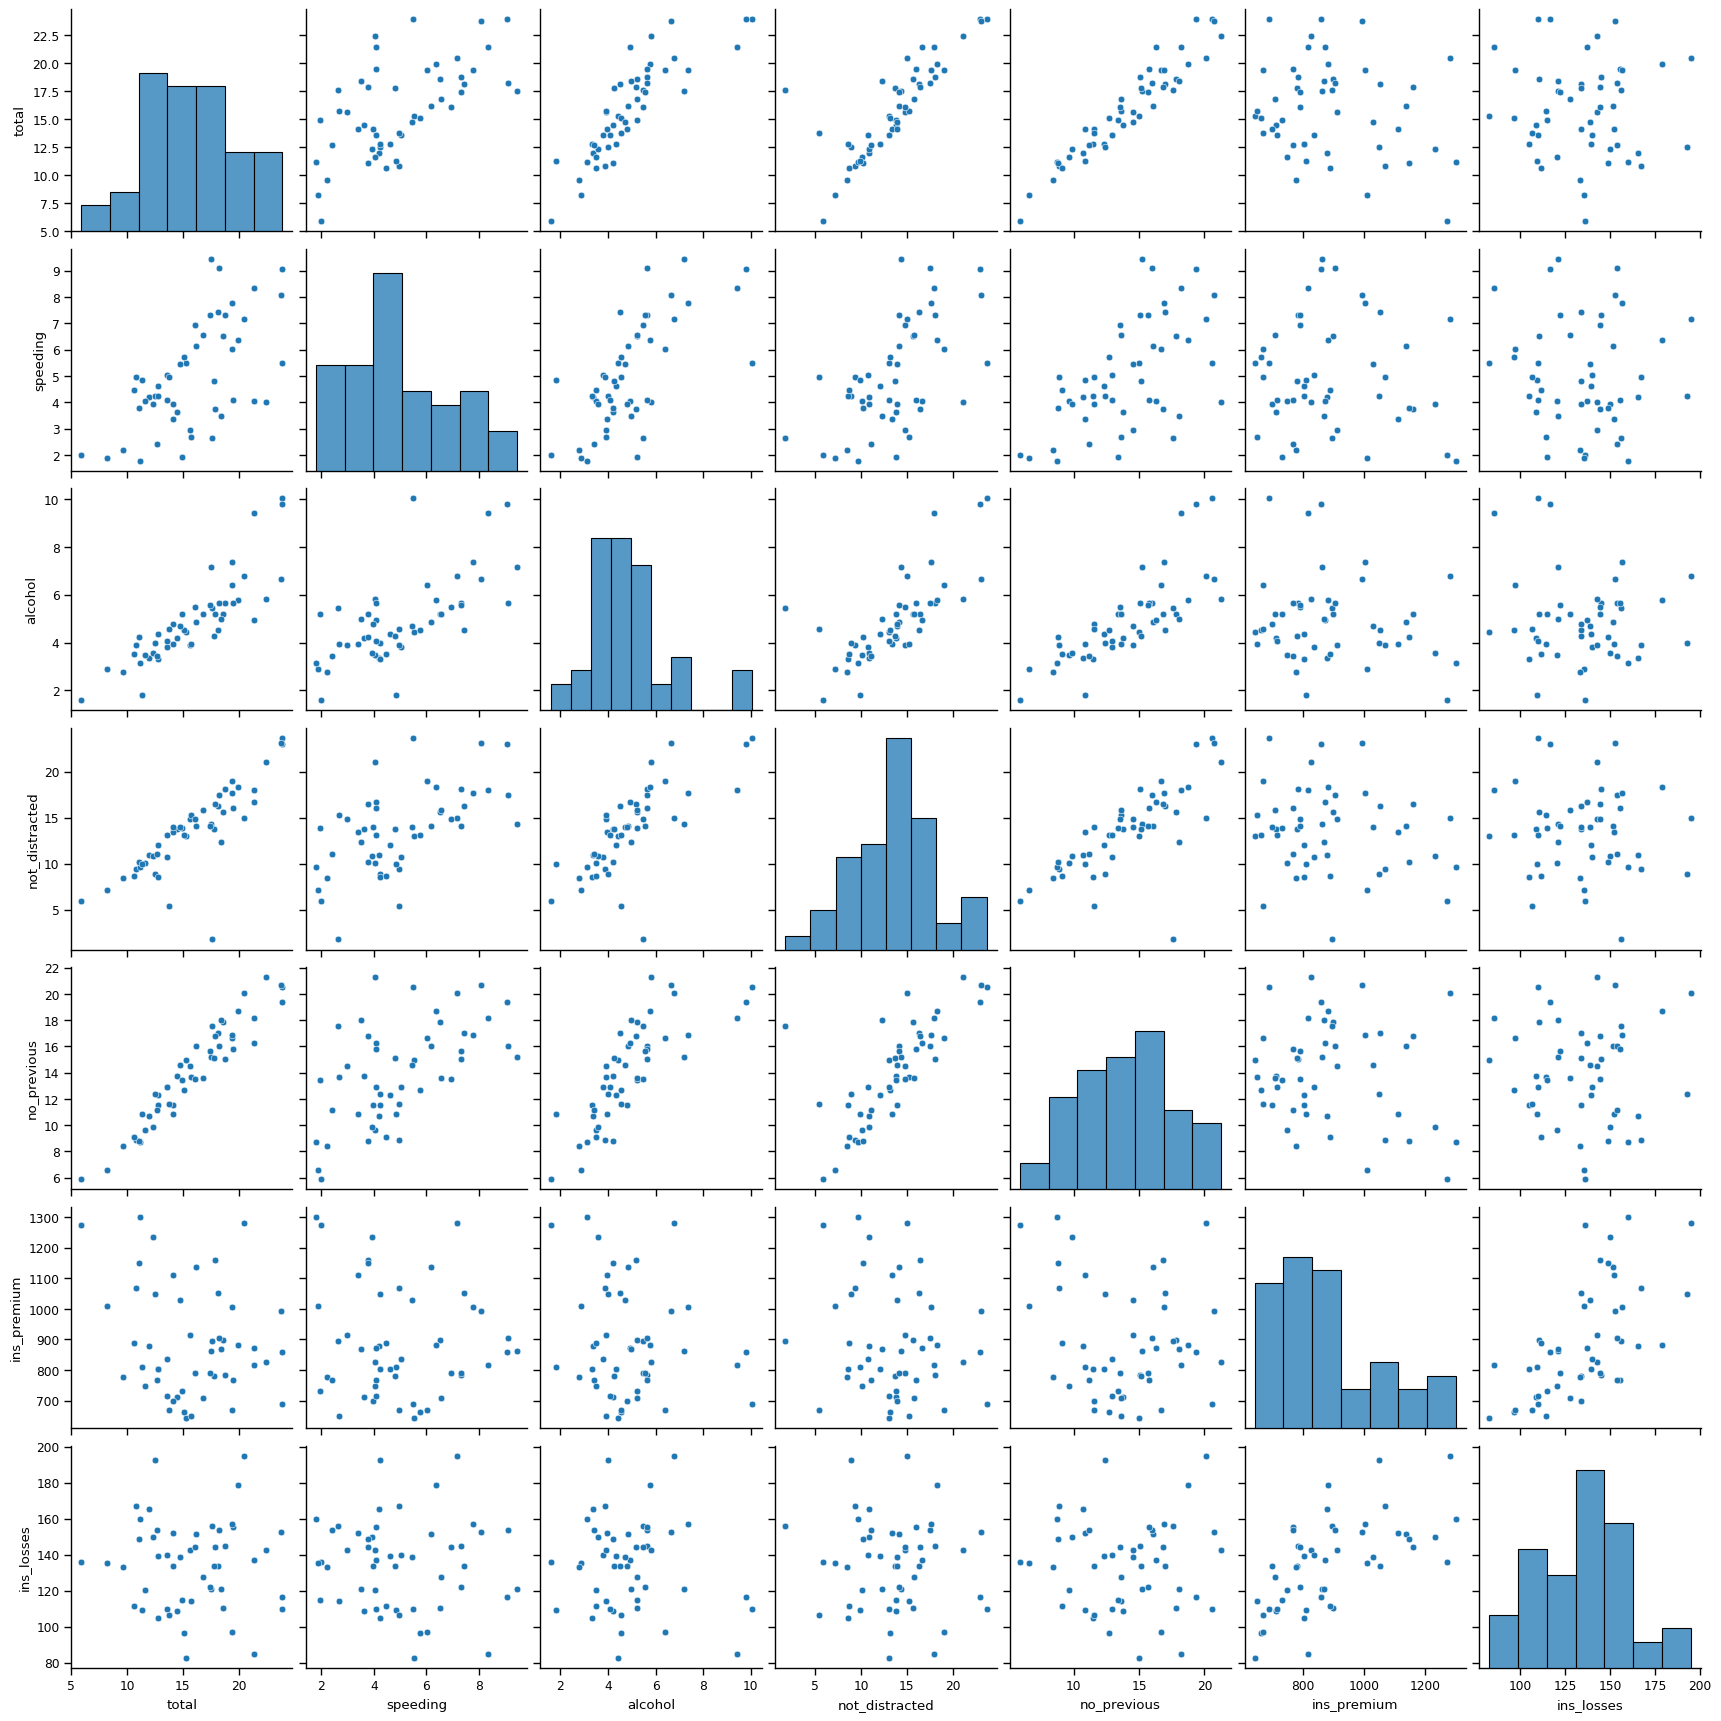

In [ ]:
sns.pairplot(crash_df)

### Heatmaps (Correlation Plots)

- Also known as highlight tables, these use color to help visualize numeric data contained in charts or tables.
- They can convey the same information as a scatterplot or a correlation table but are particularly beneficial when dealing with large numbers of variables that may cause overplotting.

In [ ]:
#Calculating a correlation matrix. (Remove any categorical variables before analysis)
crash_mx = crash_df.drop('abbrev', axis=1).corr()
crash_mx

total  speeding   alcohol  not_distracted  no_previous  \
total           1.000000  0.611548  0.852613        0.827560     0.956179   
speeding        0.611548  1.000000  0.669719        0.588010     0.571976   
alcohol         0.852613  0.669719  1.000000        0.732816     0.783520   
not_distracted  0.827560  0.588010  0.732816        1.000000     0.747307   
no_previous     0.956179  0.571976  0.783520        0.747307     1.000000   
ins_premium    -0.199702 -0.077675 -0.170612       -0.174856    -0.156895   
ins_losses     -0.036011 -0.065928 -0.112547       -0.075970    -0.006359   

                ins_premium  ins_losses  
total             -0.199702   -0.036011  
speeding          -0.077675   -0.065928  
alcohol           -0.170612   -0.112547  
not_distracted    -0.174856   -0.075970  
no_previous       -0.156895   -0.006359  
ins_premium        1.000000    0.623116  
ins_losses         0.623116    1.000000

<Axes: >

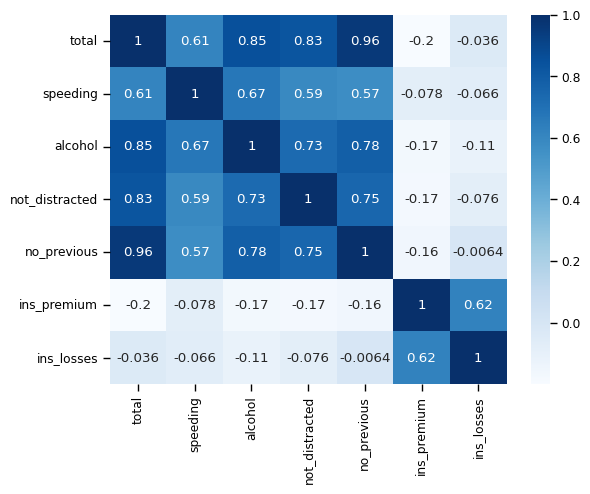

In [ ]:
sns.heatmap(crash_mx, annot=True, cmap='Blues')

### Text Visualization

**Word clouds** are visual representations that illustrate the frequency of words within a given text. The size of each word in the cloud reflects its frequency or importance; words that appear more frequently in the text are displayed in larger, bolder fonts, while less frequent words appear smaller.

In [ ]:
!pip install wordcloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


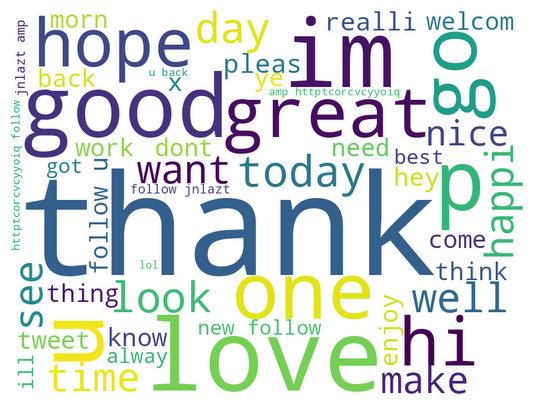

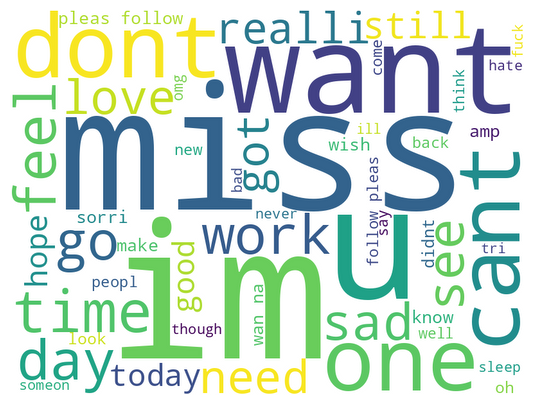

In [ ]:
#Most of this code is from Lab 2!

# Step 1: Import necessary libraries
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import twitter_samples
import numpy as np
from PIL import Image

# Ensure you have the NLTK data downloaded
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('twitter_samples')

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

df_pos = pd.DataFrame({'text': positive_tweets})
df_neg = pd.DataFrame({'text': negative_tweets})

# Step 3: Define the text preprocessing function
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation and digits
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    # Join the words back into a string
    text = ' '.join(words)

    return text

# Step 4: Apply preprocessing to the DataFrame
df_pos['processed_text'] = df_pos['text'].apply(preprocess_text)
df_neg['processed_text'] = df_neg['text'].apply(preprocess_text)

def generate_wordcloud(text, mask=None):
    wordcloud = WordCloud(
        width=800,
        height=600,
        max_words=50,
        background_color='white',
        mask=mask
    )

    # Generate the word cloud from the text
    wordcloud.generate(text)  # Call the generate method

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='lanczos')
    plt.axis('off')
    plt.show()

# Combine preprocessed text for wordcloud generation
positive_text = ' '.join(df_pos['processed_text'])
negative_text = ' '.join(df_neg['processed_text'])

# Generate word clouds for positive and negative texts
generate_wordcloud(positive_text)
generate_wordcloud(negative_text)

### Diagrams

- Diagrams can be invaluable tools for conveying complex information in a clear and visually engaging manner.
- They are particularly useful for illustrating hypothesized models, detailing research processes, and presenting statistical results of large structural models.

In [ ]:
!pip install diagrams

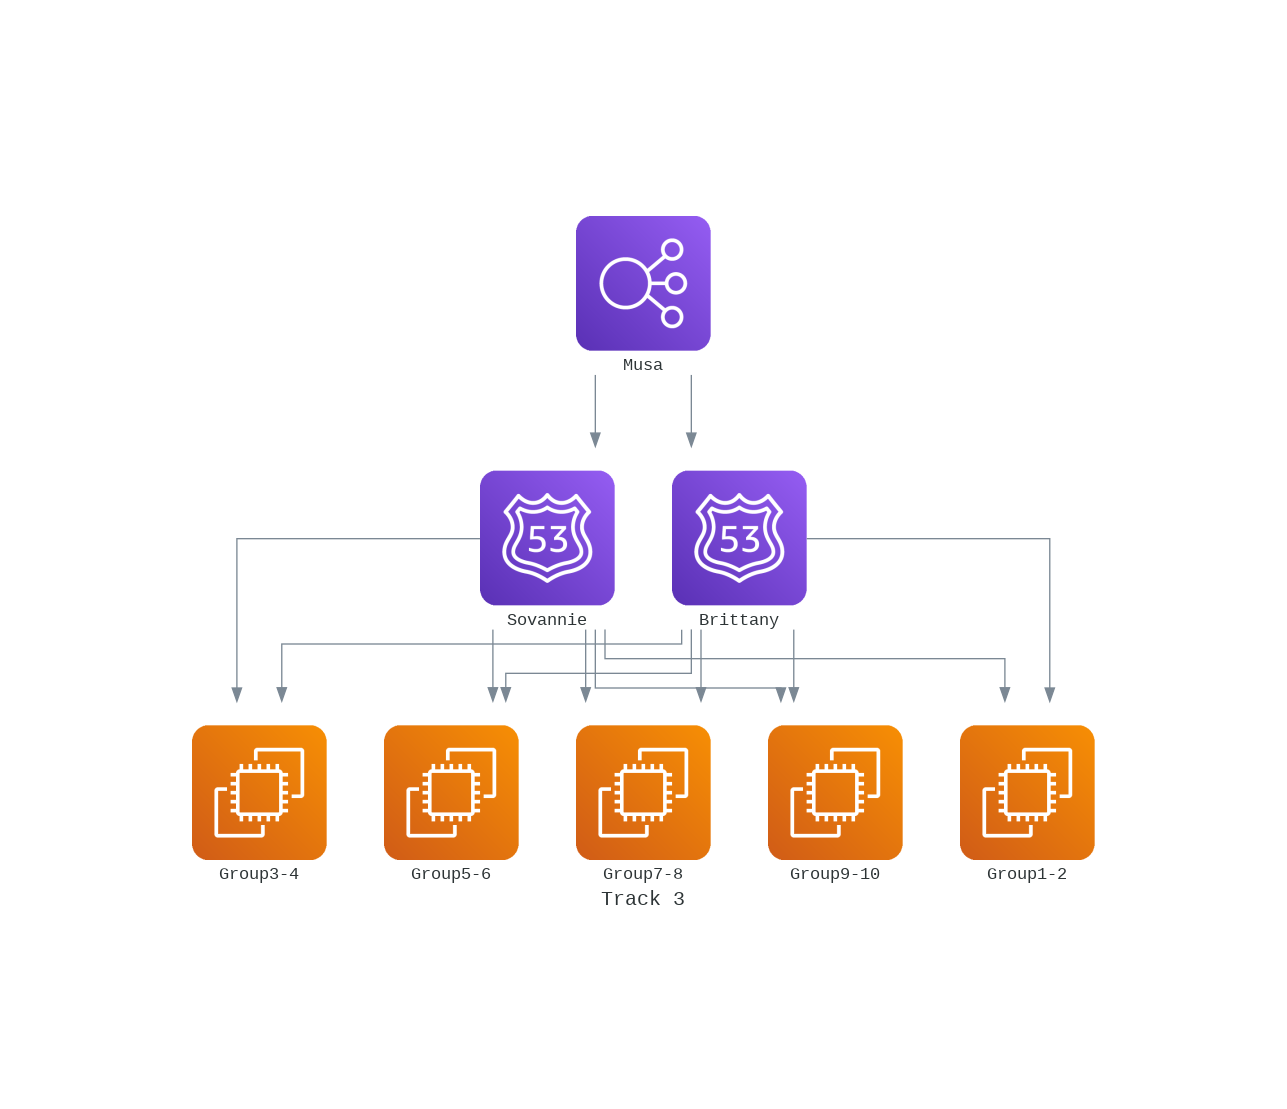

In [ ]:
from diagrams import Diagram
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB
from diagrams.aws.network import Route53


with Diagram("Track 3", show=True, direction="TB") as diag:
    elb = ELB("Musa")
    route53_1 = Route53("Sovannie")
    route53_2 = Route53("Brittany")
    ec2_nodes = [EC2(f"Group{i}-{i+1}") for i in range(1, 11, 2)]  # Create EC2 nodes in a loop

    elb >> [route53_1, route53_2]  # Connect ELB to Route53 nodes
    for node in ec2_nodes:
        route53_1 >> node  # Connect each Route53 to EC2 nodes
        route53_2 >> node

diag

**Examples**

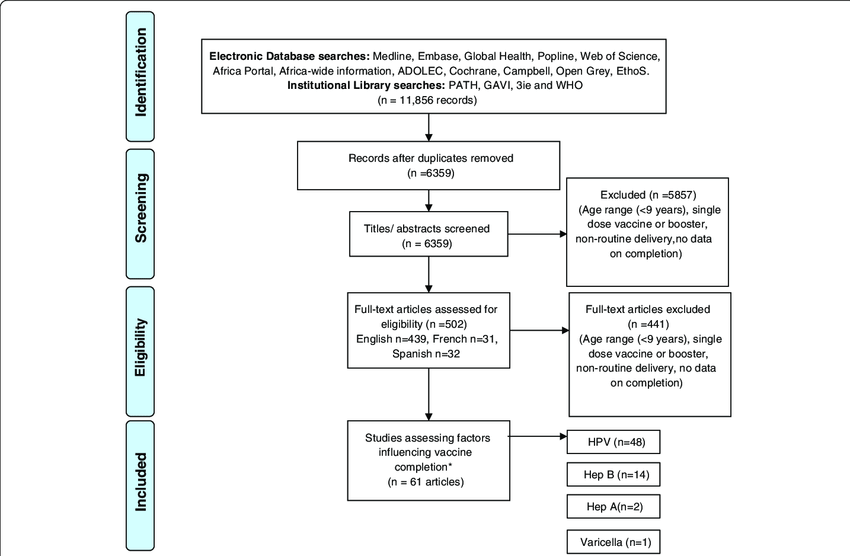

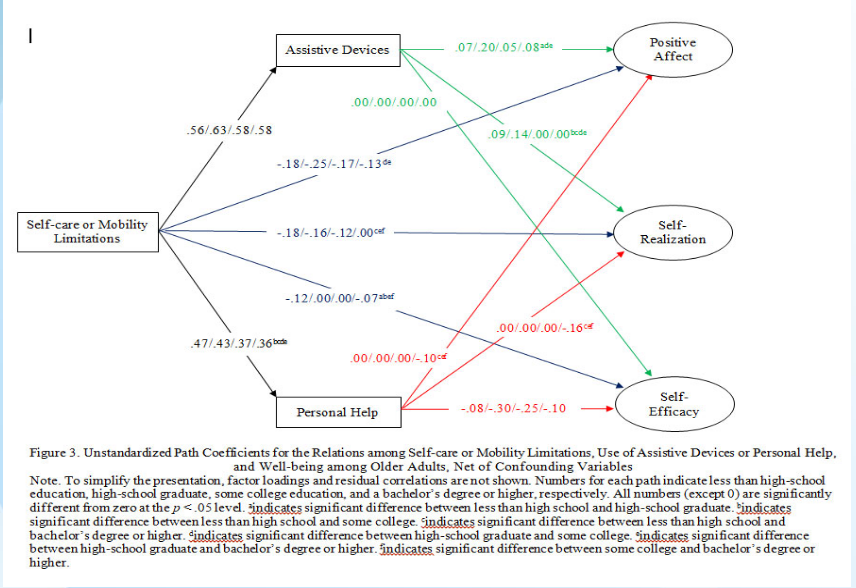

## Figure Checklist

- Is the figure necessary?
- Is the figure simple, clean, and free of extraneous detail?
- Is the figure title descriptive of the content of the figure? Are all elements of the figure clearly labeled?
- Are the magnitude, scale, and direction of grid elements clearly labeled?
- Are the figures numbered consecutively with Arabic numerals? Is the figure number bold and left aligned?
- Are all abbreviations and special symbols explained?
- If the figure has a legend, does it appear within or below the image? Are the legend’s words written in title case?


## Tables
- Tables are essential tools for presenting complex data in a clear and concise manner.
- Tables should be used to communicate information effectively without overwhelming the reader and should not duplicate the information in the text or a figure.

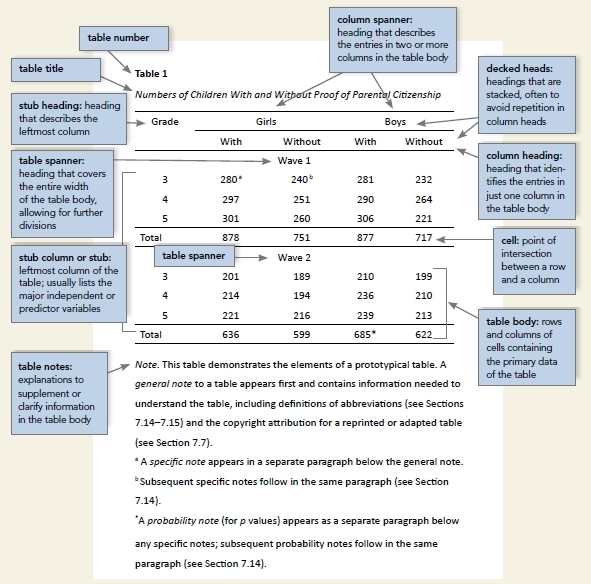

Sample Tables: https://apastyle.apa.org/style-grammar-guidelines/tables-figures/sample-tables#tests